In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyproj
from mpl_toolkits.basemap import Basemap

from datetime import datetime

import functools
from mpl_toolkits.basemap import Basemap
from scipy import interpolate
from sklearn.decomposition import PCA
import pickle
from sklearn import cluster
from scipy.spatial.distance import pdist, squareform
#from sklearn_extra.cluster import KMedoids
import sklearn.cluster as cluster

In [2]:
df_houston_2000 = pd.read_csv('../DataProcessed/df_houston_2000.csv')

/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (3,5,7,8,9,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,60,61,62,63,64,65,66,67,69,70,71,72,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,111,115,116,117,118,119,123,124,125,126,128,129,130,131,139,140,142,145,148,149,150,152,154,156) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


KeyboardInterrupt: 

In [31]:
df_houston_2000_simple = df_houston_2000[['STATION','DATE','AT1','AT2','AT3']]

In [ ]:
df_houston_2000_simple

In [49]:
station_reference = pd.read_csv('../Data/StationReference.csv')
#station_reference['STATION'].astype(str)
station_reference = station_reference[['STATION','LATITUDE','LONGITUDE','NAME']]

In [50]:
df_houston_2000_simple['1is_rain'] = df_houston_2000_simple['AT1'] == 16
df_houston_2000_simple['1is_thunder'] = df_houston_2000_simple['AT1'] == 3
df_houston_2000_simple['1is_tornado'] = df_houston_2000_simple['AT1'] == 10

df_houston_2000_simple['2is_rain'] = df_houston_2000_simple['AT2'] == 16
df_houston_2000_simple['2is_thunder'] = df_houston_2000_simple['AT2'] == 3
df_houston_2000_simple['2is_tornado'] = df_houston_2000_simple['AT2'] == 10

df_houston_2000_simple['3is_rain'] = df_houston_2000_simple['AT3'] == 16
df_houston_2000_simple['3is_thunder'] = df_houston_2000_simple['AT3'] == 3
df_houston_2000_simple['3is_tornado'] = df_houston_2000_simple['AT3'] == 10

df_houston_2000_simple

/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/aviation/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,STATION,DATE,AT1,AT2,AT3,1is_rain,1is_thunder,1is_tornado,2is_rain,2is_thunder,2is_tornado,3is_rain,3is_thunder,3is_tornado
0,99999912975,2000-01-01T05:59:00,0,0,0,False,False,False,False,False,False,False,False,False
1,99999912975,2000-01-01T05:59:00,0,0,0,False,False,False,False,False,False,False,False,False
2,99999912975,2000-01-02T05:59:00,0,0,0,False,False,False,False,False,False,False,False,False
3,99999912975,2000-01-03T05:59:00,0,0,0,False,False,False,False,False,False,False,False,False
4,99999912975,2000-01-04T05:59:00,0,0,0,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508264,99848199999,2022-04-16T17:00:00,0,0,0,False,False,False,False,False,False,False,False,False
2508265,99848199999,2022-04-16T18:00:00,0,0,0,False,False,False,False,False,False,False,False,False
2508266,99848199999,2022-04-16T19:00:00,0,0,0,False,False,False,False,False,False,False,False,False
2508267,99848199999,2022-04-16T20:00:00,0,0,0,False,False,False,False,False,False,False,False,False


In [51]:
df = df_houston_2000_simple.groupby('STATION').sum()
df.reset_index(inplace=True)
df['STATION'] = df['STATION'].astype(str)
df_houston_latlon = pd.merge(df, station_reference, on='STATION')
#df.join(station_reference, 'STATION')
#df['STATION'] = df['STATION'].astype(str)
#df[df['AT1'] != 0]
df_houston_latlon

,STATION,AT1,AT2,AT3,1is_rain,1is_thunder,1is_tornado,2is_rain,2is_thunder,2is_tornado,3is_rain,3is_thunder,3is_tornado,LATITUDE,LONGITUDE,NAME
0,72059400188,6922,5565,1401,0,203,0,0,1,0,0,0,0,29.71700,-95.38300,"HOUSTON DUNN HELISTOP, TX US"
1,72063700223,30870,33636,13471,859,948,0,745,4,0,5,3,0,29.50000,-95.47700,"HOUSTON SOUTHWEST AIRPORT, TX US"
2,72242712975,34869,31772,11681,1128,1145,0,941,0,0,0,1,0,29.51924,-95.24230,"HOUSTON CLOVER FIELD, TX US"
3,72242953910,37888,31388,11008,1213,929,0,780,0,0,1,0,0,30.06801,-95.55628,"HOUSTON HOOKS MEMORIAL AIRPORT, TX US"
4,72243012960,42099,40853,15370,1550,1360,0,1166,18,0,19,10,1,29.98438,-95.36072,"HOUSTON INTERCONTINENTAL AIRPORT, TX US"
5,72243612906,28328,22683,6226,803,746,1,620,4,0,4,2,0,29.61667,-95.16667,"HOUSTON ELLINGTON AFB, TX US"
6,72244012918,30493,27597,10074,1193,1052,2,817,17,1,8,6,0,29.64586,-95.28212,"HOUSTON WILLIAM P HOBBY AIRPORT, TX US"
7,72254312977,35576,28533,9294,1268,901,1,776,1,0,2,1,0,29.61971,-95.65748,"HOUSTON SUGARLAND MEM, TX US"
8,99848199999,0,0,0,0,0,0,0,0,0,0,0,0,29.72600,-95.26600,"MANCHESTER, TX US"


In [53]:
df_houston_latlon['sum_rain'] = df_houston_latlon[['1is_rain','2is_rain','3is_rain']].sum(axis=1)
df_houston_latlon['sum_thunder'] = df_houston_latlon[['1is_thunder','2is_thunder','3is_thunder']].sum(axis=1)
df_houston_latlon['sum_tornado'] = df_houston_latlon[['1is_tornado','2is_tornado','3is_tornado']].sum(axis=1)
df_houston_latlon_sum = df_houston_latlon[['STATION','NAME','LATITUDE','LONGITUDE','sum_rain','sum_thunder','sum_tornado']]
df_houston_latlon_sum

,STATION,NAME,LATITUDE,LONGITUDE,sum_rain,sum_thunder,sum_tornado
0,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.71700,-95.38300,0,204,0
1,72063700223,"HOUSTON SOUTHWEST AIRPORT, TX US",29.50000,-95.47700,1609,955,0
2,72242712975,"HOUSTON CLOVER FIELD, TX US",29.51924,-95.24230,2069,1146,0
3,72242953910,"HOUSTON HOOKS MEMORIAL AIRPORT, TX US",30.06801,-95.55628,1994,929,0
4,72243012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98438,-95.36072,2735,1388,1
5,72243612906,"HOUSTON ELLINGTON AFB, TX US",29.61667,-95.16667,1427,752,1
6,72244012918,"HOUSTON WILLIAM P HOBBY AIRPORT, TX US",29.64586,-95.28212,2018,1075,3
7,72254312977,"HOUSTON SUGARLAND MEM, TX US",29.61971,-95.65748,2046,903,1
8,99848199999,"MANCHESTER, TX US",29.72600,-95.26600,0,0,0


# Plot bubble

In [56]:
import plotly.graph_objects as go

In [136]:
# # https://plotly.com/python/bubble-maps/
# colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]

data = df_houston_latlon_sum
data = data.iloc[:-1,:]

In [137]:
data

,STATION,NAME,LATITUDE,LONGITUDE,sum_rain,sum_thunder,sum_tornado,labels_enc
0,72059400188,"HOUSTON DUNN HELISTOP, TX US",29.71700,-95.38300,0,204,0,0
1,72063700223,"HOUSTON SOUTHWEST AIRPORT, TX US",29.50000,-95.47700,1609,955,0,1
2,72242712975,"HOUSTON CLOVER FIELD, TX US",29.51924,-95.24230,2069,1146,0,2
3,72242953910,"HOUSTON HOOKS MEMORIAL AIRPORT, TX US",30.06801,-95.55628,1994,929,0,3
4,72243012960,"HOUSTON INTERCONTINENTAL AIRPORT, TX US",29.98438,-95.36072,2735,1388,1,4
5,72243612906,"HOUSTON ELLINGTON AFB, TX US",29.61667,-95.16667,1427,752,1,5
6,72244012918,"HOUSTON WILLIAM P HOBBY AIRPORT, TX US",29.64586,-95.28212,2018,1075,3,6
7,72254312977,"HOUSTON SUGARLAND MEM, TX US",29.61971,-95.65748,2046,903,1,7


Text(0.5, 1.0, 'Weather Bubble Plot in Houston Area')

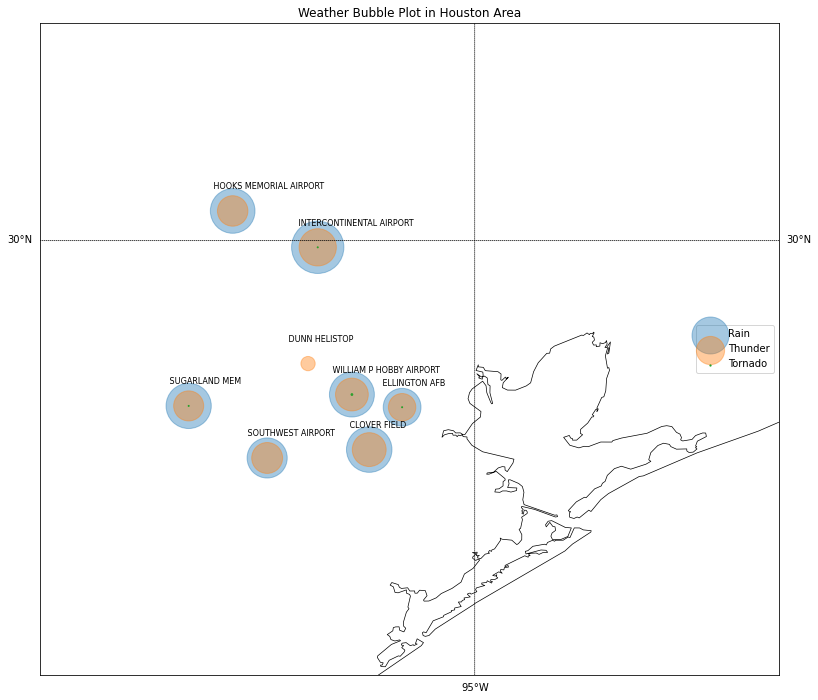

In [151]:
# Reference: https://python-graph-gallery.com/315-a-world-map-of-surf-tweets

# Plot basemap
fig = plt.figure(figsize=(16,12))
m = Basemap(resolution='h', # resolution
            llcrnrlon = -96, llcrnrlat = 29, urcrnrlon = -94.3, urcrnrlat = 30.5)
m.drawcoastlines(linewidth=0.7)
m.drawcountries(linewidth=2)
m.drawstates(linewidth=0.2)
# draw parallels
m.drawparallels(np.arange(10,90,5),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,5),labels=[1,1,0,1])

#prepare a color for each point depending on the continent.
#data['labels_enc'] = pd.factorize(data['STATION'])[0]

m.scatter(
    x=data['LONGITUDE'], 
    y=data['LATITUDE'], 
    s=data['sum_rain'], 
    alpha=0.4, 
    #c=data['labels_enc'],
    cmap="Set1",
    label='Rain'
)

m.scatter(
    x=data['LONGITUDE'], 
    y=data['LATITUDE'], 
    s=data['sum_thunder'], 
    alpha=0.4, 
    #c=data['labels_enc'], 
    cmap="Set1",
    label='Thunder'
)

m.scatter(
    x=data['LONGITUDE'], 
    y=data['LATITUDE'], 
    s=data['sum_tornado'], 
    alpha=1, 
    #c=data['labels_enc'], 
    cmap="Set1",
    label='Tornado'
)

for r in range(len(data)):
    lat = data.loc[r, 'LATITUDE']
    lon = data.loc[r, 'LONGITUDE']
    xpt,ypt = m(lon, lat) # lat, lon
    #m.plot(xpt,ypt,'bo', markersize=2)
    #text = data.loc[r,'NAME']
    text = data.loc[r,'NAME'][7:-7]
    plt.text(xpt-0.05,ypt+0.05,text, font={'size':8})
    
plt.legend(loc=7)
plt.title('Weather Bubble Plot in Houston Area')

# US area